<a href="https://colab.research.google.com/github/carolinabasile/ProblemSet1_MachineLearning/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos las librerías necesarias
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Armamos una lista para almacenar todos los datos
data = []

# Base URL de las páginas
base_url = 'https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_{}.html'

# Iteramos sobre las 10 páginas
for i in range(1, 11):

    # Construimos la URL de la página actual
    url = base_url.format(i)

    # Enviamos solicitud HTTP
    response = requests.get(url)
    print(f"Scraping página {i}: {response}")  # Confirmar que la solicitud es exitosa (<Response [200]>)

    # Parsear el contenido HTML
    soup = BeautifulSoup(response.content, 'html.parser')

    # Encontrar la tabla en la página
    table = soup.find('table')

    # Extraemos encabezados (solo en la primera iteración)
    if i == 1:  # Tomar encabezados solo de la primera página
        headers = []
        for header in table.find_all('th'):
            headers.append(header.text.strip())

    # Extraemos filas de datos
    for row in table.find_all('tr'):
        row_data = []
        for cell in row.find_all('td'):
            row_data.append(cell.text.strip())
        if row_data:  # Agregar solo filas con datos
            data.append(row_data)

# Convertimos los datos consolidados en un DataFrame
df = pd.DataFrame(data, columns=headers)

df

Scraping página 1: <Response [200]>
Scraping página 2: <Response [200]>
Scraping página 3: <Response [200]>
Scraping página 4: <Response [200]>
Scraping página 5: <Response [200]>
Scraping página 6: <Response [200]>
Scraping página 7: <Response [200]>
Scraping página 8: <Response [200]>
Scraping página 9: <Response [200]>
Scraping página 10: <Response [200]>


,,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
0,1,4514331,1,2,1,BOGOTA,1,2,0,29,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,2,4514331,1,1,1,BOGOTA,1,2,1,36,...,NA,NA,NA,8404.3203125,NA,NA,NA,NA,1620833.25,8404.3203125
2,3,4514332,1,4,1,BOGOTA,1,2,1,4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,4,4514332,1,3,1,BOGOTA,1,2,1,7,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,5,4514332,1,1,1,BOGOTA,1,2,0,32,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32172,3213,4804454,1,2,1,BOGOTA,12,2,0,24,...,NA,NA,NA,3345.5556640625,NA,NA,NA,NA,1003666.6875,3345.5556640625
32173,3214,4804455,1,1,1,BOGOTA,12,3,0,36,...,5e+05,NA,NA,25958.333984375,NA,NA,NA,NA,6675000,25958.333984375
32174,3215,4804455,1,2,1,BOGOTA,12,3,1,41,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
32175,3216,4804455,1,3,1,BOGOTA,12,3,1,8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
# Obtengo el nombre de todas las variables disponibles
variables = df.columns.tolist()

print(variables)

# Restringimos a individuos empleados mayores de 18 años (HAY QUE REVISAR SI P6240 ES LA CORRECTA)
df_limpio = df[(df['age'].astype(float) > 18) & (df['p6240'] == '1')]

print(f"Número de registros después del filtro (empleados mayores de 18 años): {len(df_limpio)}")

['', 'directorio', 'secuencia_p', 'orden', 'clase', 'dominio', 'mes', 'estrato1', 'sex', 'age', 'p6050', 'p6090', 'p6100', 'p6210', 'p6210s1', 'p6240', 'oficio', 'p6426', 'relab', 'p6500', 'p6510', 'p6510s1', 'p6510s2', 'p6545', 'p6545s1', 'p6545s2', 'p6580', 'p6580s1', 'p6580s2', 'p6585s1', 'p6585s1a1', 'p6585s1a2', 'p6585s2', 'p6585s2a1', 'p6585s2a2', 'p6585s3', 'p6585s3a1', 'p6585s3a2', 'p6585s4', 'p6585s4a1', 'p6585s4a2', 'p6590', 'p6590s1', 'p6600', 'p6600s1', 'p6610', 'p6610s1', 'p6620', 'p6620s1', 'p6630s1', 'p6630s1a1', 'p6630s2', 'p6630s2a1', 'p6630s3', 'p6630s3a1', 'p6630s4', 'p6630s4a1', 'p6630s6', 'p6630s6a1', 'p6750', 'p6760', 'p550', 'hoursWorkUsual', 'p6870', 'p6920', 'p7040', 'hoursWorkActualSecondJob', 'p7050', 'p7070', 'p7090', 'p7110', 'p7120', 'p7140s1', 'p7140s2', 'p7150', 'p7160', 'p7310', 'p7350', 'p7422', 'p7422s1', 'p7472', 'p7472s1', 'p7495', 'p7500s1', 'p7500s1a1', 'p7500s2', 'p7500s2a1', 'p7500s3', 'p7500s3a1', 'p7505', 'p7510s1', 'p7510s1a1', 'p7510s2', 'p7

In [4]:
# Primer approach para describir los datos

print("Información del DataFrame:")
print(df_limpio.info())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 13993 entries, 1 to 32172
Columns: 178 entries,  to y_total_m_ha
dtypes: object(178)
memory usage: 19.1+ MB
None


In [17]:
# Convierto algunas variables de interes a formato numerico
wage_hours_related_vars = ['p6500', 'p7070', 'hoursWorkUsual', 'hoursWorkActualSecondJob',
                           'y_salary_m', 'y_salary_m_hu', 'y_ingLab_m', 'y_ingLab_m_ha']

for col in wage_hours_related_vars:

    df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')
    print(f"{col} dtype: {df_limpio[col].dtype}")

df_limpio['hour_wage'] = (df_limpio['p6500'] + df_limpio['p7070'])/(df_limpio['hoursWorkActualSecondJob'] + df_limpio['hoursWorkUsual'])

wage_hours_related_vars = wage_hours_related_vars + ['hour_wage']

p6500 dtype: float64
p7070 dtype: float64
hoursWorkUsual dtype: int64
hoursWorkActualSecondJob dtype: float64
y_salary_m dtype: float64
y_salary_m_hu dtype: float64
y_ingLab_m dtype: float64
y_ingLab_m_ha dtype: float64


<ipython-input-17-b30e0fb66916>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')
<ipython-input-17-b30e0fb66916>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['hour_wage'] = (df_limpio['p6500'] + df_limpio['p7070'])/(df_limpio['hoursWorkActualSecondJob'] + df_limpio['hoursWorkUsual'])


In [18]:
# Estadisticos descriptivos para variables de interes
pd.set_option('display.float_format', '{:,.2f}'.format)

for col in wage_hours_related_vars:
  print("\nEstadísticas descriptivas para variables de interes:")
  print(df_limpio[col].describe())


Estadísticas descriptivas para variables de interes:
count        9,474.00
mean     1,516,954.33
std      2,164,692.61
min              0.00
25%        781,242.00
50%        900,000.00
75%      1,400,000.00
max     34,000,000.00
Name: p6500, dtype: float64

Estadísticas descriptivas para variables de interes:
count       13,973.00
mean        20,235.02
std        232,115.48
min              0.00
25%              0.00
50%              0.00
75%              0.00
max     10,000,000.00
Name: p7070, dtype: float64

Estadísticas descriptivas para variables de interes:
count   13,993.00
mean        50.14
std         12.63
min          1.00
25%         45.00
50%         48.00
75%         50.00
max        130.00
Name: hoursWorkUsual, dtype: float64

Estadísticas descriptivas para variables de interes:
count   455.00
mean     12.56
std       9.03
min       1.00
25%       6.00
50%      10.00
75%      18.00
max      50.00
Name: hoursWorkActualSecondJob, dtype: float64

Estadísticas descriptivas p

In [13]:
# Convierto algunas variables de interes a formato numerico

for col in wage_hours_related_vars:

    df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')
    print(f"{col} dtype: {df_limpio[col].dtype}")


    # Y observo la cantidad de missings y reportes de salarios igual a cero existen
    zero_count = (df_limpio[col] == 0).sum()
    na_count = df_limpio[col].isna().sum()

    print(f"Number of zeros in '{col}': {zero_count}")
    print(f"Number of missing values (NA) in '{col}': {na_count}")


p6500 dtype: float64
Number of zeros in 'p6500': 585
Number of missing values (NA) in 'p6500': 4519
p7070 dtype: float64
Number of zeros in 'p7070': 13611
Number of missing values (NA) in 'p7070': 20
hoursWorkUsual dtype: int64
Number of zeros in 'hoursWorkUsual': 0
Number of missing values (NA) in 'hoursWorkUsual': 0
hoursWorkActualSecondJob dtype: float64
Number of zeros in 'hoursWorkActualSecondJob': 0
Number of missing values (NA) in 'hoursWorkActualSecondJob': 13538
y_salary_m dtype: float64
Number of zeros in 'y_salary_m': 0
Number of missing values (NA) in 'y_salary_m': 5104
y_salary_m_hu dtype: float64
Number of zeros in 'y_salary_m_hu': 0
Number of missing values (NA) in 'y_salary_m_hu': 5104
y_ingLab_m dtype: float64
Number of zeros in 'y_ingLab_m': 0
Number of missing values (NA) in 'y_ingLab_m': 5104
y_ingLab_m_ha dtype: float64
Number of zeros in 'y_ingLab_m_ha': 0
Number of missing values (NA) in 'y_ingLab_m_ha': 5104


<ipython-input-13-734953bc3606>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')


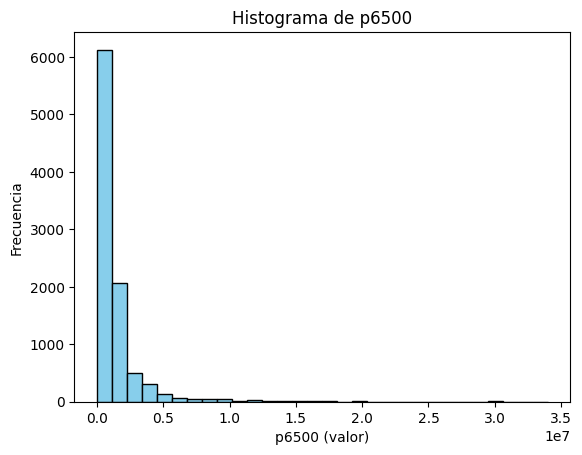

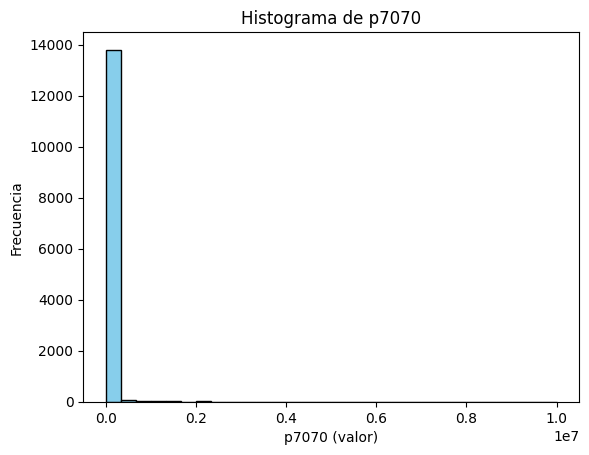

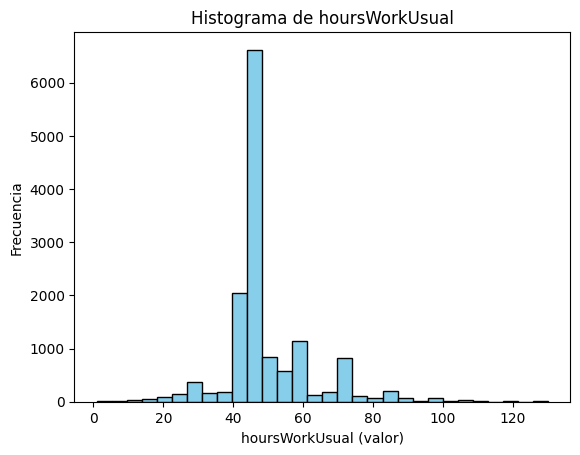

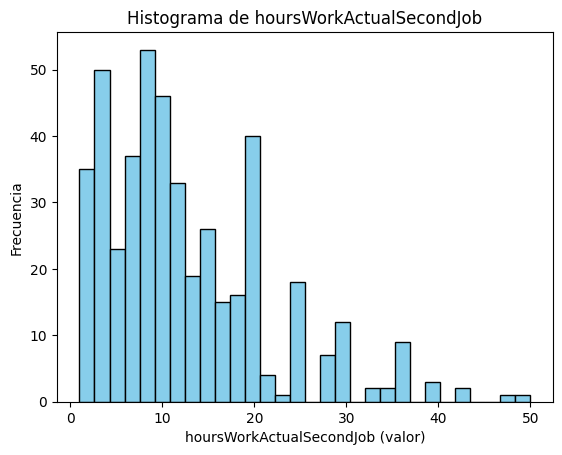

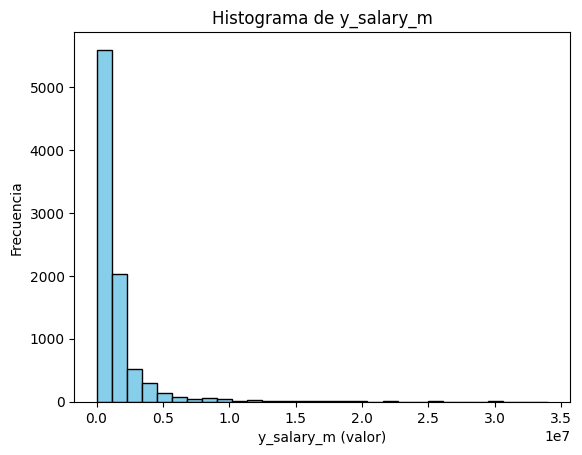

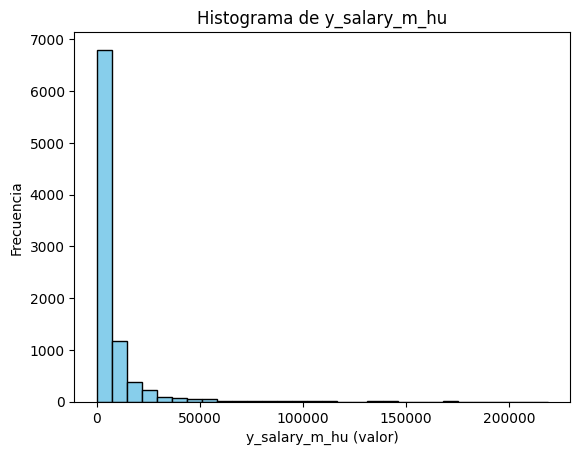

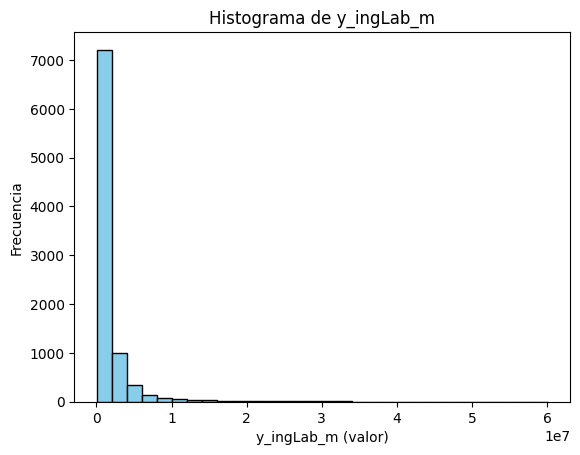

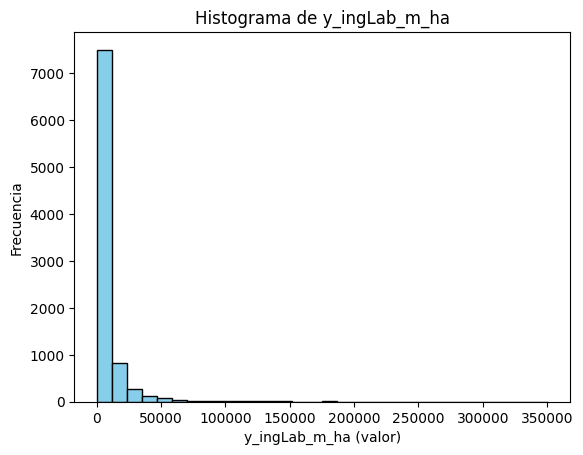

In [15]:
# Histogramas del salario horario

for col in wage_hours_related_vars:
    data = df_limpio[col].dropna()

    # Plot histogram of the variable
    plt.hist(data, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(f'{col} (valor)')
    plt.ylabel('Frecuencia')
    plt.show()


Basics for data description

In [ ]:
X = nlsy[[ "age", "black", "hispanic", "other", "exp", "afqt", "mom_educ", "dad_educ"]]

y=nlsy[["hour_wage"]]

In [ ]:
nlsy.describe()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size=0.3,
                                        train_size=0.7,
                                        random_state = 123
                                    )

we can check that the partition:

In [ ]:
X_train.head()

In [ ]:
age
p6020 sexo
p6210 -- maximo nivel ed alcanzo
dpto departamento / area maybe
p6440 contrato laboral
p6426 antiguedad
rama2d -- actividad